Building K Nearest Regression Model

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split  
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.externals.joblib import dump,load
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV as GSCV

%matplotlib inline

Load Dataset

In [2]:
ML_dataset = pd.read_csv("data\ML_dataset.csv")

Begin Model Building and Fitting

Input and Output

In [3]:
Labels = ML_dataset.drop("brand_percent_spending", axis=1).columns.tolist() #columns of drugs
print(Labels)

['specialty_description', 'nppes_provider_city', 'total_claim_count', 'total_drug_cost', 'total_day_supply', 'total_30_day_fill_count', 'bene_count']


In [4]:
X = ML_dataset[Labels]
y = ML_dataset["brand_percent_spending"]
# Seperate into attributes and Labels

PCA feature Selection with Scaling

In [5]:
X = StandardScaler().fit_transform(X)

C:\Users\John Lee\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\John Lee\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [6]:
PCA = PCA(n_components = 'mle')
X=PCA.fit_transform(X)

In [7]:
print(PCA.explained_variance_ratio_) 

[0.56906204 0.15995163 0.13578093 0.07378827 0.05048682 0.01045913]


Split Data into test and train

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
#Split into Test and Train

Fit Data into K Nearest with GridSearch Cross Validation

In [9]:
KNR = KNR(algorithm = "kd_tree")

In [10]:
parameters = {'n_neighbors': [10, 20, 30], 
              'weights': ['uniform','distance'],
             }

scorer = metrics.make_scorer(metrics.r2_score)
GSCV = GSCV(KNR, param_grid =parameters, scoring = scorer, n_jobs = -2, verbose = 1)
GSCV = GSCV.fit(X_train, y_train)
dump(GSCV.best_estimator_, "Model_Weights\KNear\KNear_best_model") #save model params
print(GSCV.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits

C:\Users\John Lee\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[Parallel(n_jobs=-2)]: Done  18 out of  18 | elapsed:  2.4min finished


{'n_neighbors': 20, 'weights': 'distance'}


In [11]:
KNR = GSCV.best_estimator_
KNR.fit(X_train, y_train)

KNeighborsRegressor(algorithm='kd_tree', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=20, p=2,
          weights='distance')

Observe CV Results

In [12]:
CV = pd.DataFrame(GSCV.cv_results_)
CV.sort_values("rank_test_score", inplace = True)
CV.head()

C:\Users\John Lee\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\John Lee\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\John Lee\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\John Lee\Anaconda3\lib\site-packages\

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
3,0.889011,0.090224,16.766856,0.409552,20,distance,"{'n_neighbors': 20, 'weights': 'distance'}",0.539258,0.540394,0.543460,0.541038,0.001775,1,1.000000,1.000000,1.000000,1.000000,0.000000
5,0.907705,0.126444,17.290989,0.962103,30,distance,"{'n_neighbors': 30, 'weights': 'distance'}",0.536351,0.538165,0.541036,0.538517,0.001929,2,1.000000,1.000000,1.000000,1.000000,0.000000
1,1.184565,0.153843,13.217942,0.238116,10,distance,"{'n_neighbors': 10, 'weights': 'distance'}",0.533566,0.533754,0.537097,0.534805,0.001622,3,1.000000,1.000000,1.000000,1.000000,0.000000
2,1.061164,0.162274,16.727958,0.649437,20,uniform,"{'n_neighbors': 20, 'weights': 'uniform'}",0.531705,0.533228,0.535961,0.533631,0.001761,4,0.580597,0.579913,0.578324,0.579611,0.000952
4,0.966748,0.189521,19.569516,1.036510,30,uniform,"{'n_neighbors': 30, 'weights': 'uniform'}",0.527537,0.529763,0.532430,0.529910,0.002000,5,0.562614,0.561827,0.560335,0.561592,0.000945


Predictions

In [13]:
#predictions
y_pred =KNR.predict(X_test)

In [14]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df.head(25) #Actual Vs Predicted Dataframebb

,Actual,Predicted
122206,0.605058,0.727757
159688,0.658229,0.634063
43739,0.736268,0.644573
331059,0.501611,0.363821
311080,0.269496,0.490982
437800,0.440781,0.337874
43707,0.863699,0.765729
422344,0.343237,0.418019
406647,0.700612,0.395671
340504,0.827114,0.804787


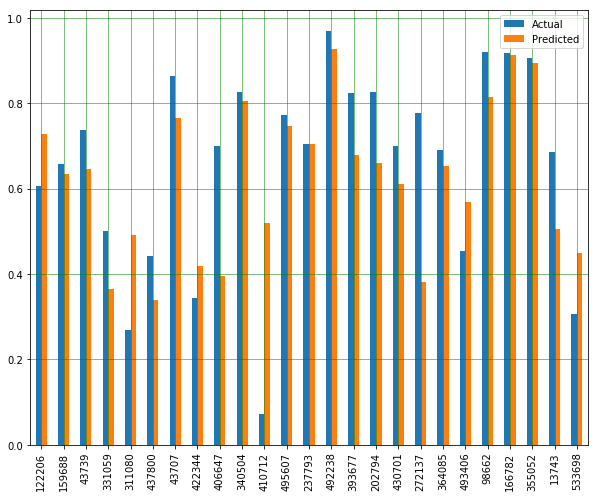

In [15]:
comparison_df.iloc[0:25].plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Text(0, 0.5, 'Predicted')

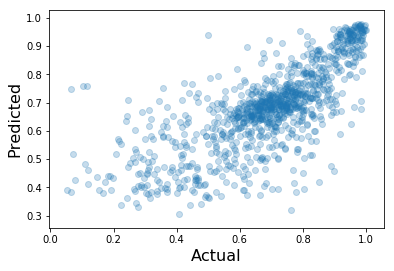

In [16]:
plt.scatter(comparison_df.iloc[0:1000]["Actual"], comparison_df.iloc[0:1000]["Predicted"], alpha = .25)
plt.xlabel("Actual", fontsize = 16) #scatter plot of specialty combined data
plt.ylabel("Predicted",  fontsize = 16)

Statistics

In [17]:
print("r Squared:", metrics.r2_score(y_test, y_pred))
rsq = metrics.r2_score(y_test, y_pred)

r Squared: 0.5523318163091222


In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
mse = metrics.mean_squared_error(y_test, y_pred)

Mean Absolute Error: 0.09400618292685481
Mean Squared Error: 0.01818185552771443


In [19]:
metrics_df = pd.read_csv("data\metrics_df.csv")
metrics_df = metrics_df.append({"Input": Labels, "R Squared": rsq, "Mean Absolute Error": mae, "Mean Squared Error": mse, "Model": "K Nearest"}, ignore_index=True)

In [20]:
metrics_df.tail()

,Input,R Squared,Mean Absolute Error,Mean Squared Error,Model
35,"['specialty_description', 'nppes_provider_city...",0.582957,0.091493,0.016986,Random Forest
36,"['specialty_description', 'nppes_provider_city...",0.570916,0.095623,0.017558,Neural Network
37,"['specialty_description', 'nppes_provider_city...",0.615159,0.088794,0.015720,Neural Network
38,"['specialty_description', 'nppes_provider_city...",0.549090,0.093914,0.018368,K Nearest
39,"[specialty_description, nppes_provider_city, t...",0.552332,0.094006,0.018182,K Nearest


In [21]:
metrics_df.to_csv("data\metrics_df.csv", index = False)

Save Trained Model

In [22]:
dump(KNR, "Model_Weights\KNear\KNear_trainedModel") 

['Model_Weights\\KNear\\KNear_trainedLoaded']